# Pokémon Heatmap with Logrithmic Shading

Trying to use a well made heatmap to gain the same information gained from the previous 17 bar charts.

The issue right now is not generating a heatmap, but the way I want the heatmap to shade.  I want the color spectrum to diverge in a logistic format as opposed to a continuous

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

% matplotlib inline

In [3]:
poke_pivot = pd.read_csv('./data/poke_pivot.csv', index_col = 0)
advantages = pd.read_csv('./data/advantages.csv', index_col = 0)

In [4]:
poke_palette = { "Bug": "#A8B820" , "Dark"    : "#705848" , "Dragon" : "#7038F8" , "Electric": "#F8D030" ,
              "Fairy" : "#EE99AC" , "Fighting": "#C03028" , "Fire"   : "#F08030" , "Flying"  : "#A890F0" ,
              "Ghost" : "#705898" , "Grass"   : "#78C850" , "Ground" : "#E0C068" , "Ice"     : "#98D8D8" ,
              "Normal": "#A8A878" , "Poison"  : "#A040A0" , "Psychic": "#F85888" , "Rock"    : "#B8A038" ,
              "Steel" : "#B8B8D0" , "Water"   : "#6890F0" ,}

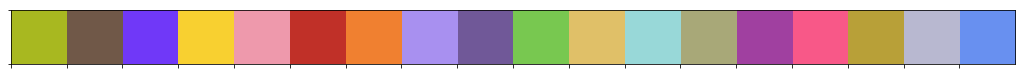

In [5]:
sns.palplot(sns.color_palette(poke_palette.values()));

In [6]:
type_by_percent_df = pd.DataFrame( columns = poke_palette.keys())

In [7]:
type_by_percent_df = pd.DataFrame( columns = poke_palette.keys())

for rows in poke_palette.keys():
    percent_list = [ i/poke_pivot.loc[rows].values[-1] for i in  poke_pivot.loc[rows].values[:-1]]

    type_by_percent_df.loc[len(type_by_percent_df)] =  percent_list


type_by_percent_df.index = poke_palette.keys()

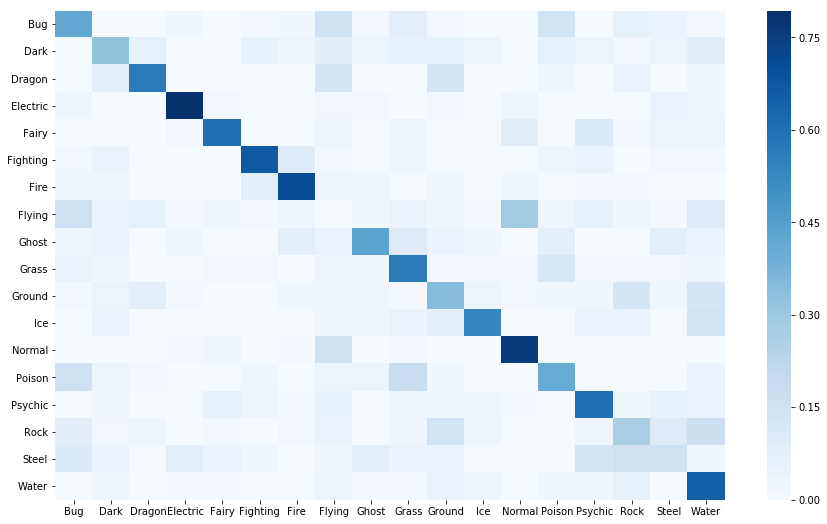

In [8]:
f, ax = plt.subplots(figsize=(15, 9))

cmap = sns.color_palette('Blues', 100,)

sns.heatmap(type_by_percent_df, cmap = cmap);

# Logrithmic Shading

As we can see from the above Heatmap it is hard to see the densities as the information fed into it was percentages and everything that had a relatively low percent below 30% is very light, and for the most part the only squares that really stand out are the "pure" squares; those that are showing the percent of "Pure" or "Single" Typings.  

In order to combat this I thought about exponentials and logarithms and trying to use those to help me shade.  The idea was to make a shading scale that got darker quicker and then much slower.  Think of the 'Law of Diminishing Returns".  

Yes, there are probably some best visualization practices that are being ignored, but it serves my purpose.  And if you're going to get up in a tizzy about it remember you're reading an analysis about Pokémon.

---
**A brief introduction to logs**
For those unfamiliar with a logarithm, its somewhat of an inverse of squares.

The purpose of logs is to figure out to what power your need to raise a _base_ to in order to get the desired number.

In [9]:
# In order to raise the value of 10 to 10 you need to raise the base 10 to a power of 1
np.log10(10)

1.0

In [10]:
# In order to raise the value of 10 to 100 you need to raise the base 10 to a power of 2 (square)
np.log10(100)

2.0

In [11]:
# In order to raise the value of 10 to 1000 you need to raise the base 10 to a power of 3 (cube)
np.log10(1000)

3.0

In [12]:
# In order to raise the value of 10 to 76 you need to raise the base 10 to a power of ~1.880813
np.log10(76)

1.8808135922807914

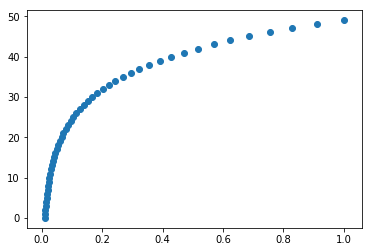

In [13]:
# This is me generating log values with a base of 10
x = np.logspace(0,2)
y = list(range(0,len(x)))
plt.scatter([a/100 for a in x ],y)

Seaborn uses RGB scales so every color is generated by combining 3 values.  
    - A Red Value
    - A Green Value
    - A Blue Value

Typically, these values exist on a 0 to 255 scale where 0 indicates no use of that color and 255 indicates that color's true form.
- Seaborn Normalizes these and thus represent them on a scale of 0 to 1.

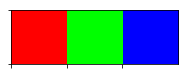

In [14]:
sns.palplot([[1,0,0],[0,1,0],[0,0,1]])

The `log_shade` function will apply the logarithmic shading to produce an array of colors in the theme of diminishing returns.

Original Shading Palette


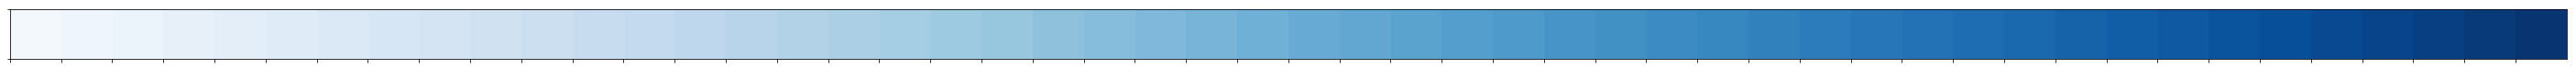

Log Scaled Shading Palette


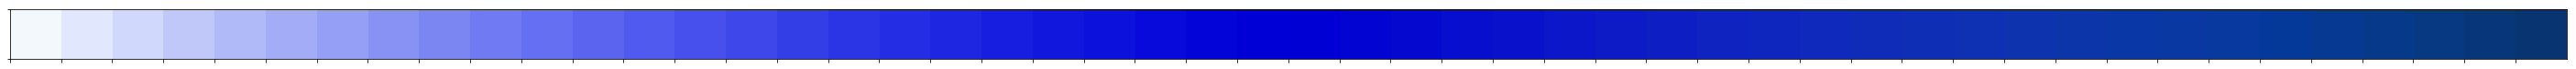

In [15]:
def log_shade(n = 10):
    original_pal = sns.color_palette('Blues', n)
    
    # original values will be length n of tuples of 3 r, g and b.
    
    
    half_one_weights = [logs - 1 for logs in np.logspace(1  , 0, num = int(n/2), base = 2)]
    half_two_weights = [logs - 1 for logs in np.logspace(0, 1  , num = int(n/2), base = 2)]
    
    weights = half_one_weights+half_two_weights
    
    
    #final_pal = [(r*weights, b*weights ,g*weights ) for r,g,b, in values for weights, values in zip(weights, original_pal)]
    
    final_pal = []
    for w, v in zip(weights, original_pal):

        final_pal.append([v[0]*w, v[1]*w, v[2],])
    print('Original Shading Palette')
    sns.palplot(sns.color_palette('Blues', n))
    plt.show()
    print('Log Scaled Shading Palette')
    sns.palplot(final_pal)
    
    return final_pal

cmap_log = log_shade(n=50)

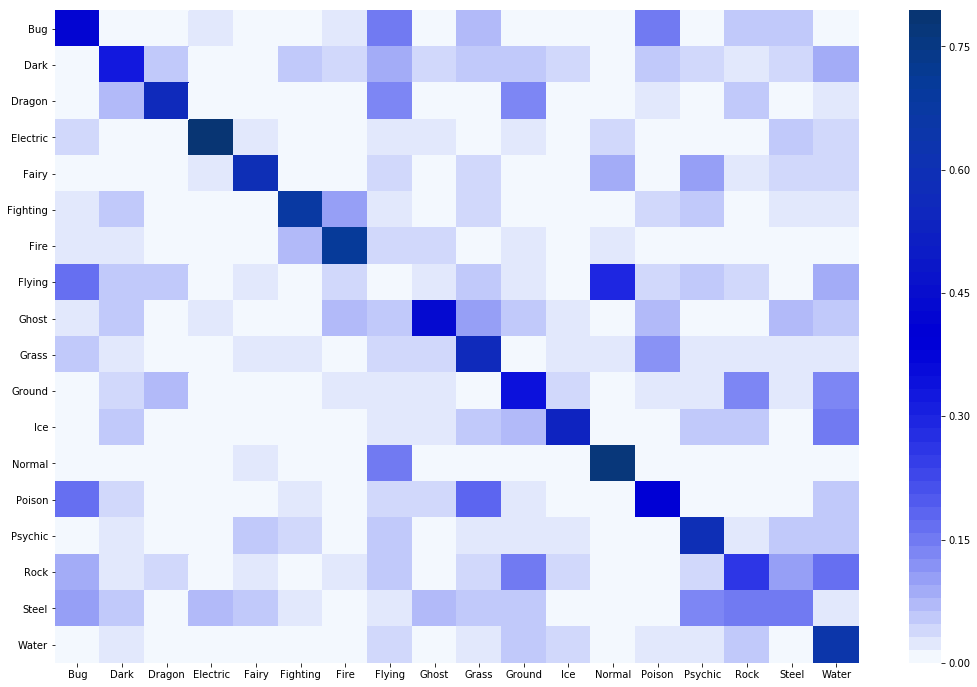

In [16]:
f, ax = plt.subplots(figsize=(18, 12))


sns.heatmap(type_by_percent_df, cmap = cmap_log);

**Disclaimer, Yeah its crude, but it gets what I needed accomplished.  Its much easier to see the type combos where there is a solid relation and those perfectly white spaces that mean there are not combinations.**